In [1]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import time

/Users/xiaoyu/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Load in x_train, x_test, y_train, y_test
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

X_train = np.array([' '.join(inner_array) for inner_array in X_train])

# Vectorizer to convert text data into tfidf features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# Creates another vectorizer but with the vocabulary from the training data
test_vectorizer = TfidfVectorizer(vocabulary=vectorizer.vocabulary_)
X_test_tfidf = test_vectorizer.fit_transform(X_test)

In [3]:
# Train and measure time taken to train
start_time = time.time()

# Initialize model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit/train the model
xgb_model.fit(X_train_tfidf, y_train)

end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken: {total_time:.2f} seconds")

# Predict on the model
y_pred = xgb_model.predict(X_test_tfidf)

# Compute AUC using probabilities for positive class
y_pred_probs = xgb_model.predict_proba(X_test_tfidf)[:, 1]
auc = roc_auc_score(y_test, y_pred_probs)
print(auc)

# Print classification report
print(classification_report(y_test, y_pred))

/Users/xiaoyu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:08:56] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Total time taken: 11.44 seconds
0.998583229621831
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      6143
         1.0       0.97      0.98      0.98      3602

    accuracy                           0.98      9745
   macro avg       0.98      0.98      0.98      9745
weighted avg       0.98      0.98      0.98      9745



/Users/xiaoyu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:09:07] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


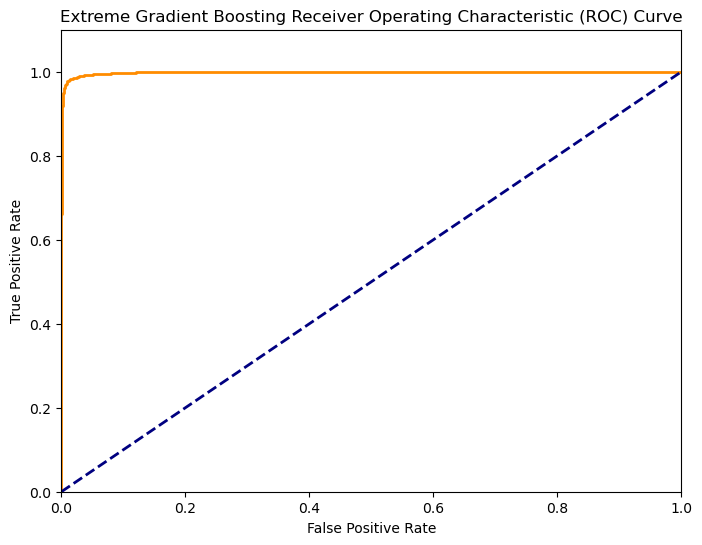

In [4]:
# Initialize model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit/train the model
xgb_model.fit(X_train_tfidf, y_train)

# Predict probabilities for the test set
probs = xgb_model.predict_proba(X_test_tfidf)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extreme Gradient Boosting Receiver Operating Characteristic (ROC) Curve')
plt.show()